In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install plotly

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install missingno

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('Online Retail.xlsx')

### EDA 

In [7]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

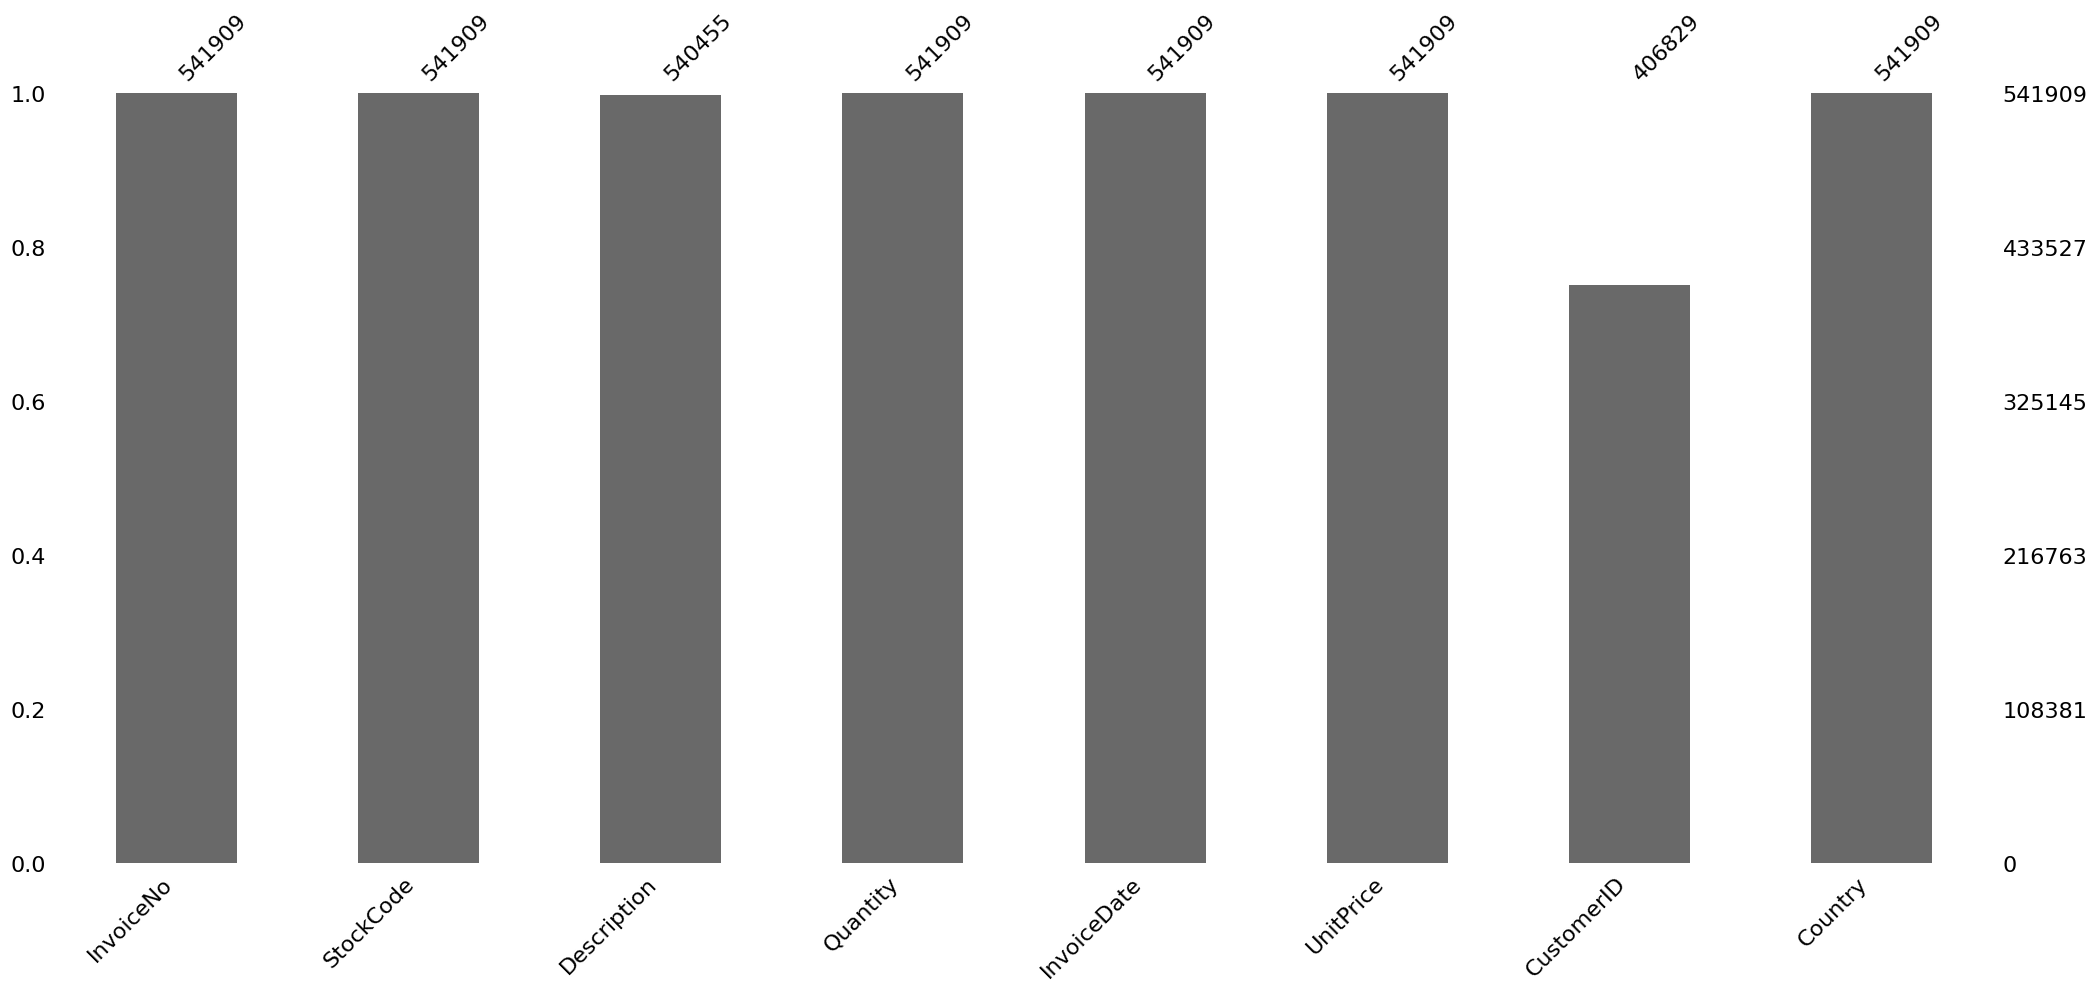

In [12]:
import missingno as no
no.bar(df)
plt.show()

In [13]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [14]:
df = df.dropna()
df.shape

(406829, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [17]:
df['Description'].fillna('No Description', inplace=True)

In [18]:
df['Description'].isna().sum()

0

In [19]:
df.shape

(406829, 8)

In [20]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [21]:
df['Quantity'] = df['Quantity'].abs()

In [22]:
df.drop(df[df['UnitPrice'] == 0].index, axis=0, inplace=True)

### Feature Engineering 

In [23]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34

In [24]:
rfm_m = df.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_m.head()

CustomerID     Amount
0     12346.0  154367.20
1     12347.0    4310.00
2     12348.0    1797.24
3     12349.0    1757.55
4     12350.0     334.40

In [25]:
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f.head()

CustomerID  InvoiceNo
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [26]:
rfm_f.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [27]:
merged_rfm = rfm_m.merge(rfm_f, on='CustomerID')
# another way 
merged_rfm.head()

CustomerID     Amount  InvoiceNo
0     12346.0  154367.20          2
1     12347.0    4310.00        182
2     12348.0    1797.24         31
3     12349.0    1757.55         73
4     12350.0     334.40         17

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   Description  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      406789 non-null  object        
 8   Amount       406789 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34

In [30]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [31]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   

               Diff  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [32]:
rfm_p = df.groupby('CustomerID')['Diff'].min().reset_index()
rfm_p.head()

CustomerID              Diff
0     12346.0 325 days 02:33:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00

In [33]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

CustomerID  Diff
0     12346.0   325
1     12347.0     1
2     12348.0    74
3     12349.0    18
4     12350.0   309

In [34]:
merged_rfm.head()

CustomerID     Amount  InvoiceNo
0     12346.0  154367.20          2
1     12347.0    4310.00        182
2     12348.0    1797.24         31
3     12349.0    1757.55         73
4     12350.0     334.40         17

In [35]:
merged_rfm = merged_rfm.merge(rfm_p, on='CustomerID')

merged_rfm.rename(columns={'Diff': 'Recency'}, inplace=True)
merged_rfm.head()

CustomerID     Amount  InvoiceNo  Recency
0     12346.0  154367.20          2      325
1     12347.0    4310.00        182        1
2     12348.0    1797.24         31       74
3     12349.0    1757.55         73       18
4     12350.0     334.40         17      309

In [36]:
print(merged_rfm.columns)

Index(['CustomerID', 'Amount', 'InvoiceNo', 'Recency'], dtype='object')


In [37]:
import plotly.express as px

attributes = ['Amount', 'InvoiceNo', 'Recency']
data = merged_rfm[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

In [38]:
merged_rfm['Frequency'] = merged_rfm.groupby('CustomerID')['InvoiceNo'].transform('nunique')

# Print the columns to verify
print(merged_rfm.columns)

# Removing (statistical) outliers for Amount
Q1 = merged_rfm.Amount.quantile(0.05)
Q3 = merged_rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Amount >= Q1 - 1.5*IQR) & (merged_rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = merged_rfm.Recency.quantile(0.05)
Q3 = merged_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Recency >= Q1 - 1.5*IQR) & (merged_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = merged_rfm.Frequency.quantile(0.05)
Q3 = merged_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Frequency >= Q1 - 1.5*IQR) & (merged_rfm.Frequency <= Q3 + 1.5*IQR)]


Index(['CustomerID', 'Amount', 'InvoiceNo', 'Recency', 'Frequency'], dtype='object')


In [39]:
attributes = ['Amount', 'Frequency', 'Recency']

fig = px.box(merged_rfm, y=attributes, title="Outliers Variable Distribution", 
             labels={'variable': 'Attributes', 'value': 'Range'},
             boxmode='group', points='outliers')

fig.update_layout(
    xaxis=dict(title="Attributes", title_font=dict(size=14)),
    yaxis=dict(title="Range", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [40]:
from sklearn.preprocessing import StandardScaler

merged_rfm = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(merged_rfm)
rfm_df_scaled.shape

(4306, 3)

In [41]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

Amount  Frequency   Recency
0  1.571371        0.0 -0.903419
1  0.231615        0.0 -0.179987
2  0.210453        0.0 -0.734949
3 -0.548343        0.0  2.148870
4  1.121723        0.0 -0.566478

### Building the Model 

In [42]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [43]:
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 0])

In [44]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

fig = px.line(x=range_n_clusters, y=ssd, 
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'})

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

For n_clusters=2, the Elbow score is 4859.569730148314
For n_clusters=3, the Elbow score is 2280.128656914974
For n_clusters=4, the Elbow score is 1585.9126060752174
For n_clusters=5, the Elbow score is 1156.5396940871879
For n_clusters=6, the Elbow score is 887.0057878507093
For n_clusters=7, the Elbow score is 746.9491644666467
For n_clusters=8, the Elbow score is 631.6108139991807


In [45]:
ssd

[4859.569730148314,
 2280.128656914974,
 1585.9126060752174,
 1156.5396940871879,
 887.0057878507093,
 746.9491644666467,
 631.6108139991807]

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Instantiate and fit_transform StandardScaler
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(merged_rfm)

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5245393784127206
For n_clusters=3, the silhouette score is 0.5904838371944622
For n_clusters=4, the silhouette score is 0.5365116829781241
For n_clusters=5, the silhouette score is 0.5101165129649993
For n_clusters=6, the silhouette score is 0.48755113243475234
For n_clusters=7, the silhouette score is 0.431231587866436
For n_clusters=8, the silhouette score is 0.4286917307358192


In [47]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [48]:
 kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [49]:
merged_rfm['Cluster_Id'] = kmeans.labels_
merged_rfm.head()

Amount  Frequency  Recency  Cluster_Id
1  4310.00          1        1           2
2  1797.24          1       74           0
3  1757.55          1       18           0
4   334.40          1      309           1
5  3466.67          1       35           0

In [50]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Amount',
             title="Cluster Id vs Amount Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster_Id')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [51]:
fig = px.scatter(merged_rfm, x='Cluster_Id', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)

fig.show()

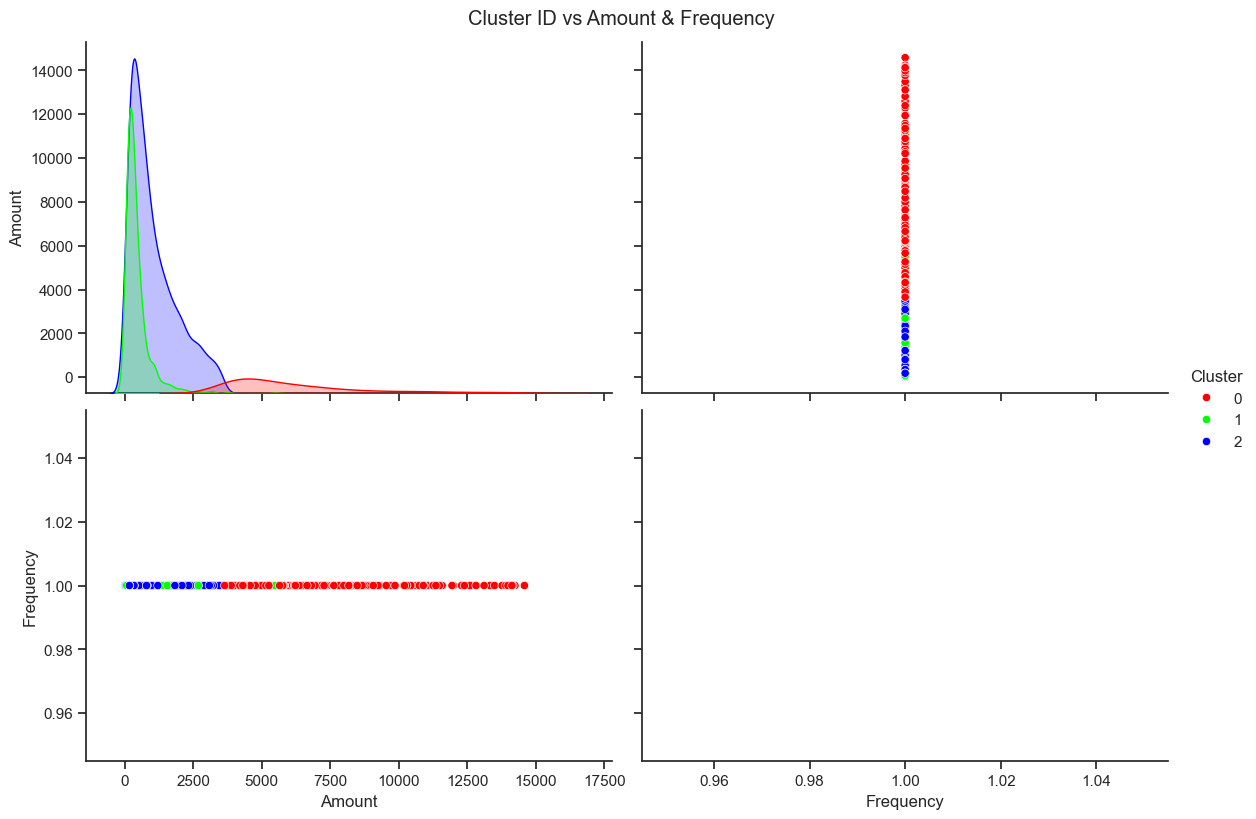

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure necessary libraries are imported
from sklearn.metrics import silhouette_score

# Assuming merged_rfm DataFrame is already available
# Select relevant columns
merged_rfm = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Scale the data
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(merged_rfm)

# Perform KMeans clustering
num_clusters = 3  # Assuming 3 clusters for illustration; adjust as needed
kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled)
merged_rfm['Cluster'] = kmeans.labels_

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()


### Box plot to visualize Cluster Id vs Recency 

In [53]:
# Ensure the 'Cluster' column is used instead of 'Cluster_Id'
fig = px.box(merged_rfm, x='Cluster', y='Recency',
             title="Cluster ID vs Recency Box Plot",
             labels={'Cluster': 'Cluster ID', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


In [54]:
# Selecting the two features for clustering
data_for_clustering = merged_rfm[['Recency', 'Amount']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(merged_rfm, x='Recency', y='Amount', color='Cluster_2D',
                 title='Clustering by Recency and Amount',
                 labels={'Recency': 'Recency', 'Amount': 'Amount', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Recency", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()


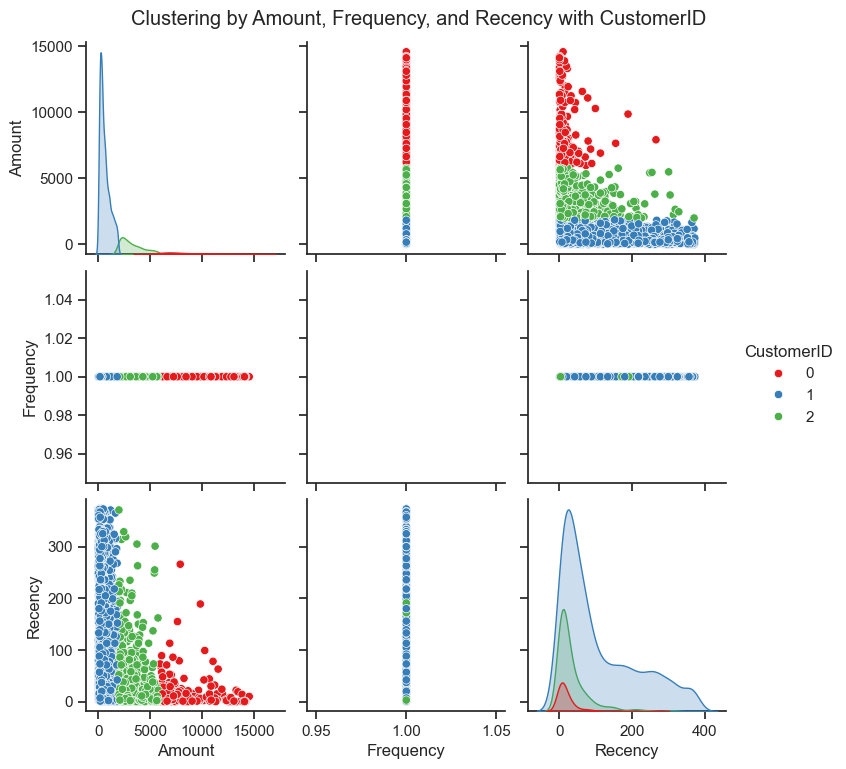

In [55]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['CustomerID'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='CustomerID', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency with CustomerID', y=1.02)
plt.show()


In [56]:
import plotly.express as px

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

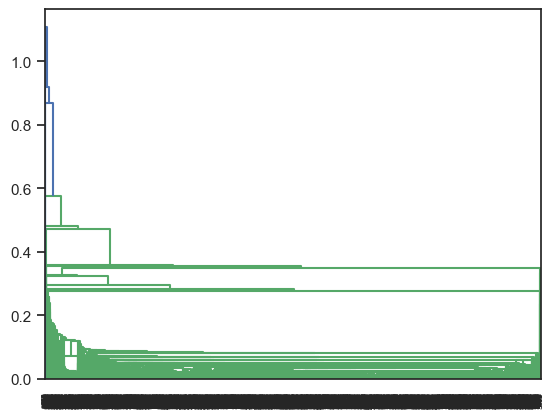

In [57]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

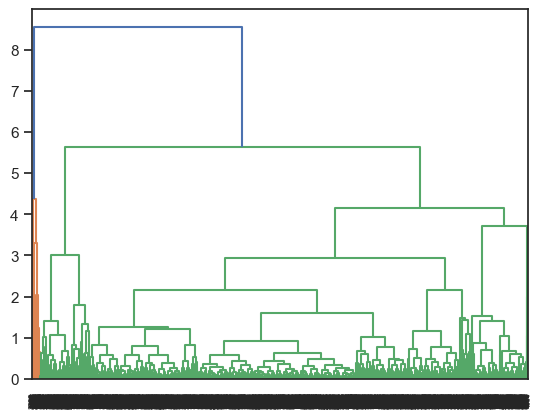

In [58]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

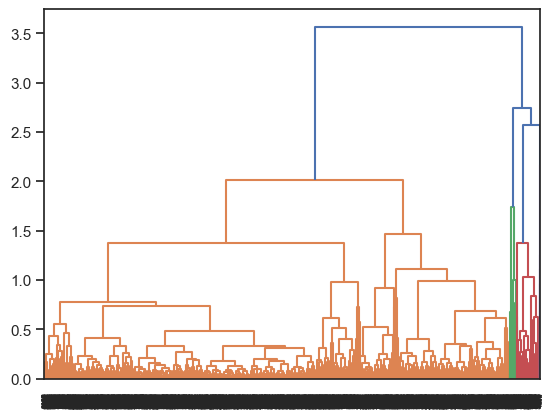

In [59]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [60]:
from scipy.cluster.hierarchy import linkage, fcluster

# Perform hierarchical clustering
mergings = linkage(data_for_clustering, method='complete', metric='euclidean')

# Cut the dendrogram to obtain cluster labels
cluster_labels = fcluster(mergings, 3, criterion='maxclust')

# Reshape the cluster labels if needed
cluster_labels = cluster_labels.reshape(-1,)

# Print cluster labels
print(cluster_labels)


[2 3 3 ... 3 3 3]


In [61]:
# Assign cluster labels

merged_rfm['Cluster_Labels'] = cluster_labels
merged_rfm.head()

Amount  Frequency  Recency  Cluster  Cluster_2D  CustomerID  Cluster_3D  \
1  4310.00          1        1        0           2           2           0   
2  1797.24          1       74        2           0           1           2   
3  1757.55          1       18        2           0           1           2   
4   334.40          1      309        1           0           1           2   
5  3466.67          1       35        2           2           2           0   

   Cluster_Labels  
1               2  
2               3  
3               3  
4               3  
5               3

In [62]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Amount',
             title="Cluster Labels vs Amount Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Amount': 'Amount'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [63]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Frequency',
             title="Cluster Labels vs Frequency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [64]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Recency',
             title="Cluster Labels vs Recency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


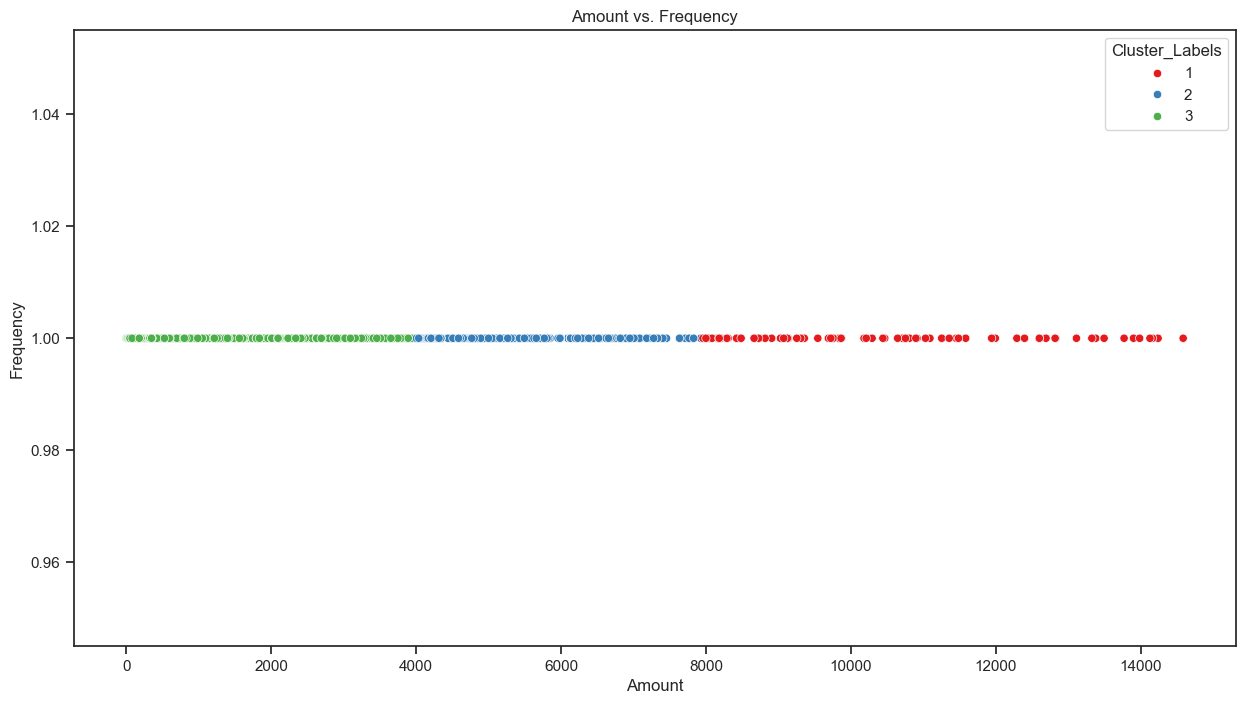

In [65]:
# Pairwise scatter plots for clustering (2D)
plt.figure(figsize=(15, 8))  # Adjust the figure size here

# Amount vs. Frequency
sns.scatterplot(x='Amount', y='Frequency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Frequency');

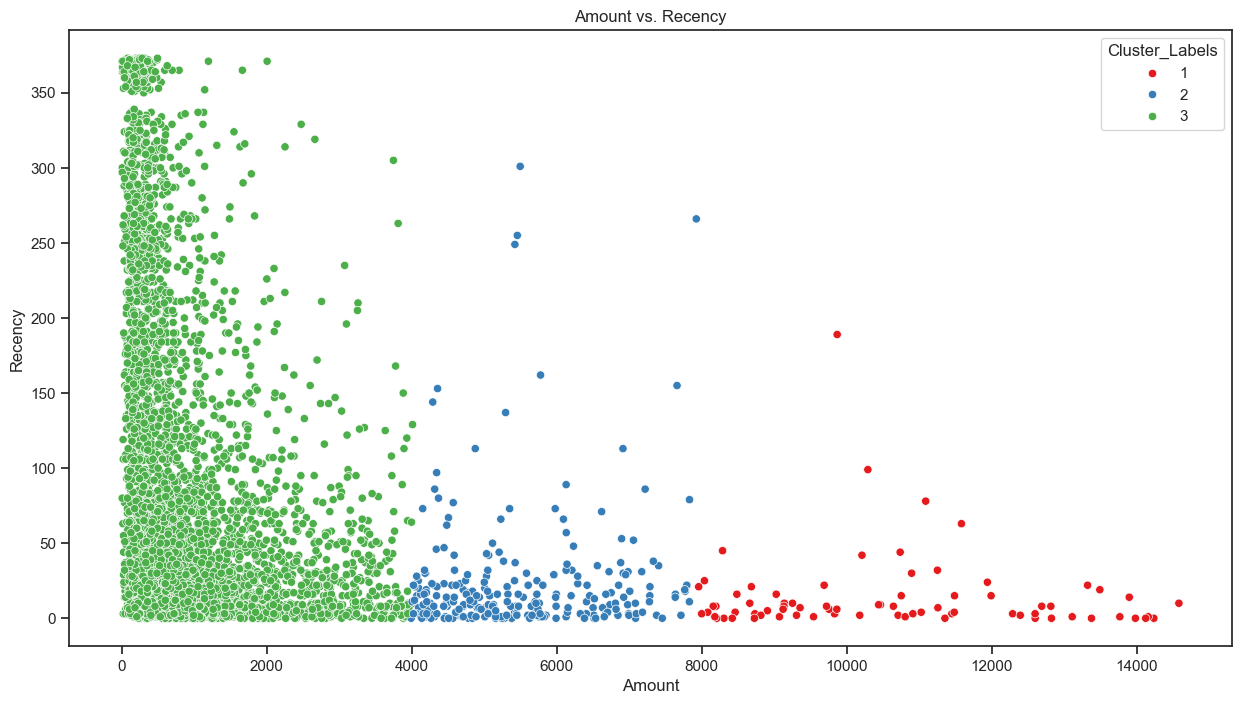

In [66]:
plt.figure(figsize=(15, 8))  # Adjust the figure size here

sns.scatterplot(x='Amount', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Recency');

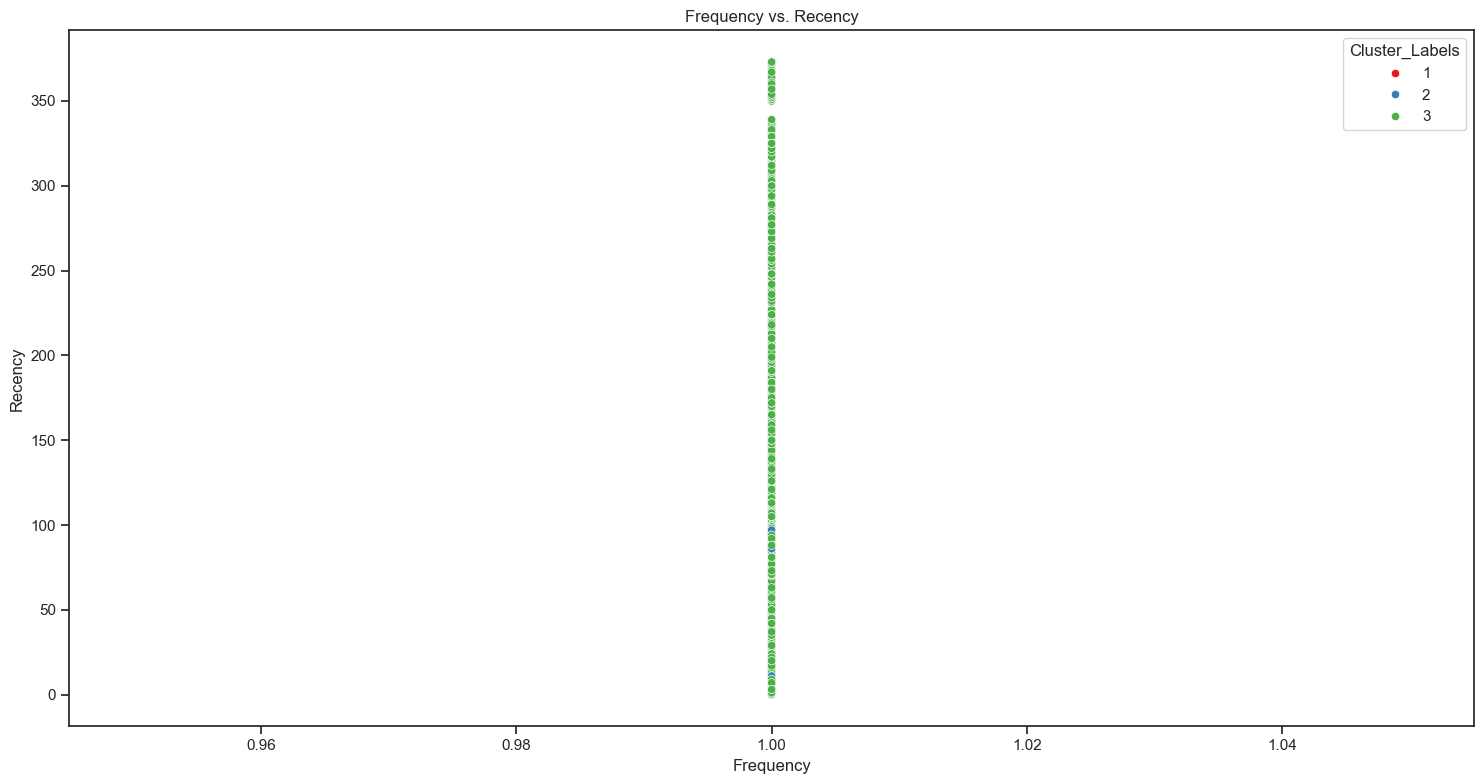

In [67]:
# Frequency vs. Recency
plt.figure(figsize=(15, 8))  # Adjust the figure size here
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Frequency vs. Recency')

plt.tight_layout()
plt.show()

In [68]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

In [70]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7425313088940557
